In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import sys
import os
import matplotlib.pyplot as plt
import swan_vis as swan
import yaml
from snakemake.io import expand
import cerberus
import pyranges as pr
from pyfaidx import Fasta
import upsetplot

p = os.path.dirname(os.getcwd())
sys.path.append(p)

from scripts.utils import *
from scripts.vcf_utils import *
from scripts.plotting import *

In [2]:
config = load_config()
od = '../'

def proc_cfg(entry, od):
    entry = entry.replace('../../', '')
    entry = od+entry
    return entry

## Filtered

In [22]:
mt_df = pd.read_csv('../data/05_mastertable/poder_master_table_fixed_genics.tsv', sep='\t')
# mt_df = mt_df.loc[mt_df['filter']=='pass']
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)

mt_df = mt_df[['espresso', 'flair', 'isoquant', 'lyric', 'structural_category']]
for c in ['espresso', 'flair', 'isoquant', 'lyric']:
    mt_df[c] = mt_df[c].astype(bool)
mt_df = mt_df.set_index(['espresso', 'flair', 'isoquant', 'lyric'])

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'extra0': <AxesSubplot:ylabel='Count by structural category'>}

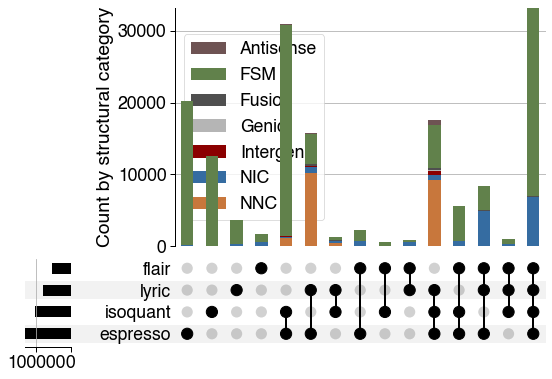

In [23]:
c_dict, order = get_novelty_colors()
init_plot_settings()
upset = upsetplot.UpSet(mt_df, intersection_plot_elements=0)  # disable the default bar chart
upset.add_stacked_bars(
    by="structural_category", colors=c_dict, title="Count by structural category", elements=10
)
upset.plot()

## UMA

In [24]:
mt_df = pd.read_csv('../data/05_mastertable/master_table.tsv', sep='\t')
# mt_df = mt_df.loc[mt_df['filter']=='pass']
mt_df['pop_spec_t'] = (mt_df.population_sharing==1)&\
                      (mt_df.sample_sharing>1)

mt_df = mt_df[['espresso', 'flair', 'isoquant', 'lyric', 'structural_category']]
for c in ['espresso', 'flair', 'isoquant', 'lyric']:
    mt_df[c] = mt_df[c].astype(bool)
mt_df = mt_df.set_index(['espresso', 'flair', 'isoquant', 'lyric'])

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'extra0': <AxesSubplot:ylabel='Count by structural category'>}

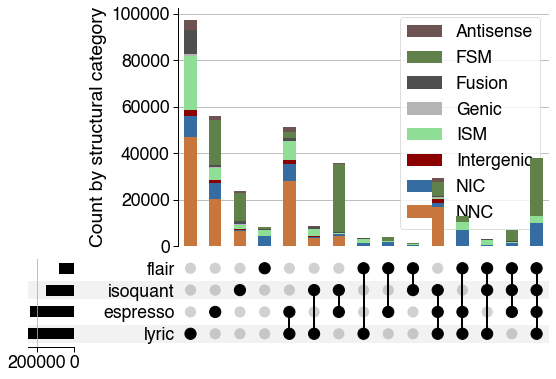

In [25]:
c_dict, order = get_novelty_colors()
init_plot_settings()
upset = upsetplot.UpSet(mt_df, intersection_plot_elements=0)  # disable the default bar chart
upset.add_stacked_bars(
    by="structural_category", colors=c_dict, title="Count by structural category", elements=10
)
upset.plot()


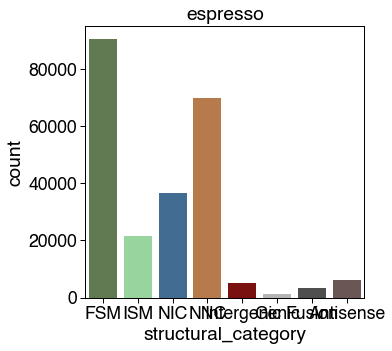

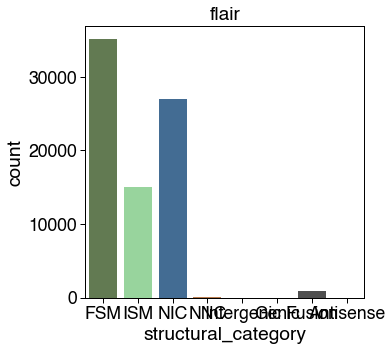

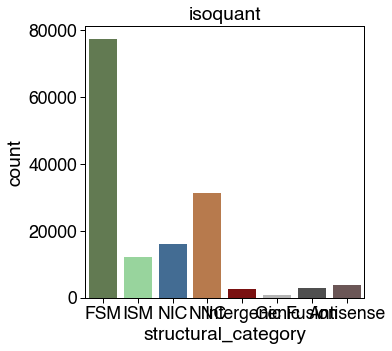

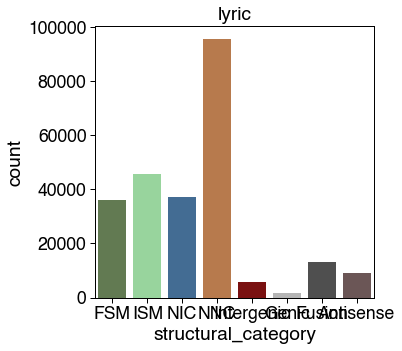

In [27]:
mt_df.reset_index(inplace=True)
for c in ['espresso', 'flair', 'isoquant', 'lyric']:
    temp = mt_df.loc[mt_df[c] == True]
    ax = sns.countplot(temp, x='structural_category', palette=c_dict, order=order)
    ax.set(title=c)
    plt.show()